In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [20]:
data = pd.read_csv("IPL_IMB_data-1.csv")
data

,PLAYER NAME,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,...,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,SOLD PRICE
0,"Abdulla, YA",2,SA,Allrounder,0,0,0,0.00,0,0.0,...,0,0.00,0.00,0,307,15,20.47,8.90,13.93,50000
1,Abdur Razzak,2,BAN,Bowler,214,18,657,71.41,185,37.6,...,0,0.00,0.00,0,29,0,0.00,14.50,0.00,50000
2,"Agarkar, AB",2,IND,Bowler,571,58,1269,80.62,288,32.9,...,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,350000
3,"Ashwin, R",1,IND,Bowler,284,31,241,84.56,51,36.8,...,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,850000
4,"Badrinath, S",2,IND,Batsman,63,0,79,45.93,0,0.0,...,71,32.93,120.71,28,0,0,0.00,0.00,0.00,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,"Yadav, AS",2,IND,Batsman,0,0,0,0.00,0,0.0,...,16,9.80,125.64,2,0,0,0.00,0.00,0.00,750000
126,Younis Khan,2,PAK,Batsman,6398,7,6814,75.78,3,86.6,...,3,3.00,42.85,0,0,0,0.00,0.00,0.00,225000
127,Yuvraj Singh,2,IND,Batsman,1775,9,8051,87.58,109,44.3,...,66,26.32,131.88,67,569,23,24.74,7.02,21.13,1800000
128,Zaheer Khan,2,IND,Bowler,1114,288,790,73.55,278,35.4,...,23,9.90,91.67,1,1783,65,27.43,7.75,21.26,450000


In [21]:
data.drop(["PLAYER NAME"], axis=1, inplace=True)


In [22]:
y = data["SOLD PRICE"]
features = data.drop("SOLD PRICE", axis=1)
x_num = features.select_dtypes("number")
x_cat = features.select_dtypes("object")

scaler = StandardScaler()
x_num_scaled = scaler.fit_transform(x_num)
x_num_scaled= pd.DataFrame(x_num_scaled, columns=x_num.columns)

In [23]:
# categorical encoding
# any categorical columsn we have and have more than two categories we will prefer to one hot encoding
# it is ordinal

# for ordinal  also even if we use one hot encoding we are giving more flexibility to the model to choose.


x_cat_encoded = pd.get_dummies(x_cat, drop_first=False).astype("int")

In [24]:
x_cat

,COUNTRY,PLAYING ROLE
0,SA,Allrounder
1,BAN,Bowler
2,IND,Bowler
3,IND,Bowler
4,IND,Batsman
...,...,...
125,IND,Batsman
126,PAK,Batsman
127,IND,Batsman
128,IND,Bowler


- Label: In machine learning, a label is the target variable or output you want to predict. For example, in a dataset of house prices, the price is the label.

- Ordinal: Ordinal data are categorical variables with a clear, ordered relationship between the categories. For example, "Low", "Medium", "High" or education levels ("Bachelor", "Master", "PhD"). The order matters, but the difference between categories is not necessarily equal.

- Nominal: Nominal data are categorical variables without any order or ranking among the categories. Examples include colors ("Red", "Blue", "Green") or types of animals ("Cat", "Dog", "Bird"). The categories are just names or labels.

In [25]:
output = train_test_split(x_num_scaled, x_cat_encoded, y, test_size=0.2, random_state=42) # everytime you get different train and test data

x_num_scaled_train = output[0]
x_num_scaled_test = output[1]
x_categorical_encoded_train = output[2]
x_categorical_encoded_test = output[3]
y_train = output[4]
y_test = output[5]

In [26]:
x_num_scaled_train

,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
70,1.580231,-0.657994,-0.468108,-0.702762,-0.820368,-0.677733,0.298933,-0.67873,-0.832572,-1.225226,-1.331887,-2.243153,-0.745369,0.272361,0.314308,0.145728,0.196148,0.298226
78,-0.160701,-0.657994,-0.468108,-0.702202,1.117719,-0.686760,-1.277132,-0.67873,-0.827677,-1.197649,-1.377129,-1.473115,-0.745369,-0.013527,-0.283869,0.938127,0.641045,0.649863
47,-0.160701,-0.354312,-0.468108,-0.420563,0.129294,-0.686760,-1.277132,-0.67873,1.169532,0.594794,0.490495,0.357261,0.434258,-0.855007,-0.790019,-1.115257,-1.260432,-1.142498
0,-0.160701,-0.657994,-0.468108,-0.703043,-2.758455,-0.686760,-1.277132,-0.67873,-0.839099,-1.307954,-1.693829,-3.102880,-0.745369,-0.303010,-0.099814,-0.127413,0.547597,-0.226928
12,-1.901634,-0.656476,-0.447000,-0.692394,-0.219174,-0.397890,0.261407,-0.67873,-0.289214,-0.646128,-0.474082,0.056902,-0.366203,2.415619,2.568976,4.979746,6.481588,5.443296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.160701,-0.657994,-0.468108,-0.703043,-2.758455,-0.686760,-1.277132,-0.67873,0.079552,-0.342792,0.062498,0.339100,0.055092,-0.382124,-0.467923,0.697801,0.515093,0.557189
106,-0.160701,-0.424159,1.445673,-0.663249,0.093246,0.134713,-0.012528,-0.67873,-0.724879,-0.949465,-1.271261,-0.688269,-0.703239,1.489631,1.924786,-0.048752,0.076290,0.181890
14,-0.160701,-0.657994,-0.468108,-0.683706,-0.584309,-0.686760,-1.277132,-0.67873,1.673729,1.311772,1.150136,0.314792,0.771294,-0.736337,-0.605964,-0.318997,0.415550,-0.353780
92,-0.160701,1.116121,-0.306281,0.878618,0.178134,-0.542325,0.085038,-0.67873,-0.719984,-0.453096,-0.042466,-0.383439,-0.703239,-0.855007,-0.790019,-1.115257,-1.260432,-1.142498


# Linear Regression

In [27]:
features_final_train = pd.concat([x_num_scaled_train, x_categorical_encoded_train], axis=1)
features_final_test = pd.concat([x_num_scaled_test, x_categorical_encoded_test], axis=1)

In [28]:

model = LinearRegression()

model.fit(features_final_train, y_train)

pred_train = model.predict(features_final_train)

print("train", r2_score(y_train, pred_train))

pred_test = model.predict(features_final_test)

print("test", r2_score(y_test, pred_test))

train 0.5416227625719827
test 0.3830637102282064


In [29]:
features_final_train

,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Allrounder,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper
70,1.580231,-0.657994,-0.468108,-0.702762,-0.820368,-0.677733,0.298933,-0.67873,-0.832572,-1.225226,...,0,0,0,0,0,0,0,0,1,0
78,-0.160701,-0.657994,-0.468108,-0.702202,1.117719,-0.686760,-1.277132,-0.67873,-0.827677,-1.197649,...,0,0,0,0,0,0,0,0,1,0
47,-0.160701,-0.354312,-0.468108,-0.420563,0.129294,-0.686760,-1.277132,-0.67873,1.169532,0.594794,...,0,0,0,0,0,0,0,0,0,1
0,-0.160701,-0.657994,-0.468108,-0.703043,-2.758455,-0.686760,-1.277132,-0.67873,-0.839099,-1.307954,...,0,0,1,0,0,0,1,0,0,0
12,-1.901634,-0.656476,-0.447000,-0.692394,-0.219174,-0.397890,0.261407,-0.67873,-0.289214,-0.646128,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.160701,-0.657994,-0.468108,-0.703043,-2.758455,-0.686760,-1.277132,-0.67873,0.079552,-0.342792,...,0,0,0,0,0,0,1,0,0,0
106,-0.160701,-0.424159,1.445673,-0.663249,0.093246,0.134713,-0.012528,-0.67873,-0.724879,-0.949465,...,0,0,1,0,0,0,0,0,1,0
14,-0.160701,-0.657994,-0.468108,-0.683706,-0.584309,-0.686760,-1.277132,-0.67873,1.673729,1.311772,...,0,0,0,0,0,0,0,1,0,0
92,-0.160701,1.116121,-0.306281,0.878618,0.178134,-0.542325,0.085038,-0.67873,-0.719984,-0.453096,...,0,0,0,0,1,0,0,1,0,0


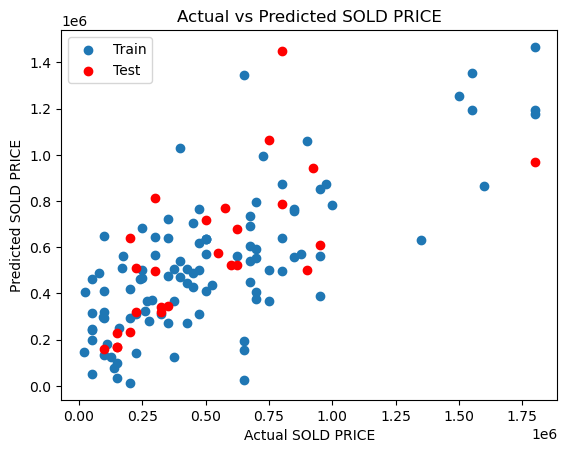

In [30]:
plt.scatter(y_train, model.predict(features_final_train), label="Train")
plt.scatter(y_test, model.predict(features_final_test), label="Test", color="red")
plt.xlabel("Actual SOLD PRICE")
plt.ylabel("Predicted SOLD PRICE")
plt.legend()
plt.title("Actual vs Predicted SOLD PRICE")
plt.show()

In [31]:
# plt.scatter(y, y_train)
# plt.plot(features_final_test, model.predict(features_final_test), color="red")
# plt.legend(loc="best")
# plt.show()

In [32]:

model = Lasso(alpha=10)

model.fit(features_final_train, y_train)

pred_train = model.predict(features_final_train)

print("train", r2_score(y_train, pred_train))

pred_test = model.predict(features_final_test)

print("test", r2_score(y_test, pred_test))

train 0.5416223597110263
test 0.3829576000025726


In [33]:
model.coef_

array([ -63936.80568164, -139951.66771139,  -19364.68547631,
        197973.53723124,   -9233.18229541,  101758.11491578,
        -17452.17980622,   66241.04073261,   61616.71695162,
       -196436.87009105,  223828.96132303,  -59319.62587086,
        119322.82336883,   26638.53515367,   68708.47092507,
         59181.74906095,  -39867.37292894,  -47159.1282908 ,
         -5899.32267212, -223767.78428175,  574127.2009376 ,
        117313.46037406,  146244.17543013,   37036.8196053 ,
             0.        ,  -47752.64999643,  -98871.22259113,
       -180634.87336993,   -4224.9040486 ,   87544.60014734,
          3189.87515982,  -84895.50301216])

In [34]:

model = Ridge(alpha=9999999)

model.fit(features_final_train, y_train)

pred_train = model.predict(features_final_train)

print("train", r2_score(y_train, pred_train))

pred_test = model.predict(features_final_test)

print("test", r2_score(y_test, pred_test))

train 2.419553406762809e-05
test -0.00036421699908517624


In [49]:

model = ElasticNet(alpha=111, l1_ratio=1) # Lasson(alpha=111)

# ElasticNet(alpha=111, l1_ratio=0) = Ridge(alpha=111)

model.fit(features_final_train, y_train)

pred_train = model.predict(features_final_train)

print("train", r2_score(y_train, pred_train))

pred_test = model.predict(features_final_test)

print("test", r2_score(y_test, pred_test))

train 0.5415726248578863
test 0.3818527128464396


Note:

- If we see under fitting we will not apply Ridge, Lasso, ElasticNet
- 

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import numpy as np

# Define parameter grid
param_grid = {
    'alpha': [0, 0.001, 0.01, 1, 10, 100, 100],  # Example values for alpha
    'l1_ratio': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]  # Example values for l1_ratio
} 

# Initialize ElasticNet model
elastic_net = ElasticNet()
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, 
    cv=5, # 5-fold cross-validation it mean td will be divinded into 5 parts.
    scoring='neg_mean_squared_error' # scoring functions are slwayshigher the better.
)

In [47]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Fit the grid search
print("Starting grid search...")
grid_search.fit(features_final_train, y_train)

# Get bests parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_  # Negate because we used neg_mean_squared_error

print("Best Parameters:", best_params)
print("Best Cross-Validation Score (MSE):", best_score)  # Negate to get positive MSE value


Starting grid search...
Best Parameters: {'alpha': 10, 'l1_ratio': 0.9}
Best Cross-Validation Score (MSE): -149417938533.7167


Parameter are the internal coefficients or weights that a machine learning model learns from the training data. For example, in linear regression, the slope and intercept are parameters.

Hyperparameters are external settings or configurations set before training a model. They control the learning process but are not learned from the data. Examples include learning rate, number of trees in a random forest, or the alpha value in Ridge/Lasso/Elastic Net.

- Parameters: learned by the model during training.
- Hyperparameters: set by the user before training, often tuned for best performance.

Hyperparameter tuning (like GridSearchCV) helps find the best hyperparameter values for optimal model accuracy.



#  Feature Selection

In [53]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.1 MB/s eta 0:00:00


In [ ]:
# Feature Selection
# Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. 
# It helps improve model performance, reduce overfitting, and decrease training time

# Forward Selection, Backward Elimination, Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE, f_regression, SelectKBest
from mlxtend.feature_selection import SequentialFeatureSelector

# Forward Selection (one line)
forward_selector = SequentialFeatureSelector(LinearRegression(),
    k_features=10, # number of features to select
    forward=True, # forward selection
    scoring='r2', # scoring metric)
).fit(features_final_train, y_train)

# Backward Elimination (one line)
backward_selector = SequentialFeatureSelector(LinearRegression(),
    k_features=10, # number of features to select
    forward=False, # backward elimination
    scoring='r2', # scoring metric)
).fit(features_final_train, y_train)

# RFE (one line)
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=10).fit(features_final_train, y_train)  # number of features to select


In [59]:
forward_selector.k_feature_names_

('AGE',
 'T-WKTS',
 'RUNS-S',
 'COUNTRY_BAN',
 'COUNTRY_ENG',
 'COUNTRY_IND',
 'COUNTRY_NZ',
 'COUNTRY_PAK',
 'COUNTRY_WI',
 'COUNTRY_ZIM')